<a href="https://colab.research.google.com/github/Elathius/transfer-learning-w-pneumonia/blob/master/Transfer_learning_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab
https://github.com/anjanatiha/Pneumonia-Detection-from-Chest-X-Ray-Images-with-Deep-Learning/blob/master/code/Detection%20of%20Pneumonia%20from%20Chest%20X-Ray%20Images%201.0.0.3.ipynb
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

https://keras.io/preprocessing/image/ | https://keras.io/models/model/

---------------------
# P1 Data collection and directory
---------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Upload kaggle json file with API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elathius","key":"95919ae16dc61b466b7b77041ff15806"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:31<00:00, 107MB/s]
100% 2.29G/2.29G [00:31<00:00, 78.7MB/s]


In [5]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

-------------------------------------------------
# P2
------


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import os
import numpy as np
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image



Using TensorFlow backend.


Helper funcs
(https://github.com/mannybernabe/transferLearning_pneumonia/blob/master/Transfer_Learning_Xray_Pneumonia.ipynb)

In [0]:
def search_dir(type="normal", num=6):
  #Helper function to scan contents of directory
  counter=0

  for file in os.listdir(train_dir + type.upper()+ "/"):
      if counter == num:
          break

      if file.endswith(".jpeg"):
          print(file)

      counter += 1

In [0]:
def plot_images(type="normal", num=6):
  #Helper function to plot images
  counter=0
  fig = plt.figure(figsize=(10, 8))
  

  for file in os.listdir(train_dir + type.upper()):

      if file.endswith(".jpeg"):
          if counter == num:
              break

          img = mpimg.imread(train_dir + type.upper()+"/"+file)
          plt.subplot(231+counter)
          plt.title(file.split('.')[0])
          imgplot = plt.imshow(img)

          counter += 1

In [0]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [0]:
def get_model():
  base_model = InceptionV3(weights='imagenet', include_top=False)
  x = base_model.output
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(1024, activation='sigmoid')(x)
  x = keras.layers.BatchNormalization()(x)
  predictions = keras.layers.Dense(2, activation='softmax')(x)
  model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

  for layer in base_model.layers:
    layer.trainable = False
  
  model.summary()
  return model

----------------


In [0]:
#Directory variables
train_dir = "chest_xray/train/"
val_dir   = "chest_xray/test/"

test_dir  = "chest_xray/val/" 

In [12]:
#Display directory file samples
search_dir(type="pneumonia", num=10)
search_dir(type="normal", num=10)


person67_bacteria_332.jpeg
person419_virus_861.jpeg
person515_bacteria_2189.jpeg
person1471_bacteria_3831.jpeg
person1082_virus_1794.jpeg
person922_bacteria_2847.jpeg
person23_bacteria_84.jpeg
person600_bacteria_2456.jpeg
person1021_virus_1711.jpeg
person1746_bacteria_4585.jpeg
NORMAL2-IM-0582-0001.jpeg
NORMAL2-IM-1371-0001.jpeg
IM-0306-0001.jpeg
NORMAL2-IM-1314-0001.jpeg
IM-0240-0001.jpeg
IM-0511-0001-0002.jpeg
NORMAL2-IM-0526-0001.jpeg
NORMAL2-IM-1277-0001-0002.jpeg
IM-0286-0001.jpeg
IM-0311-0001.jpeg


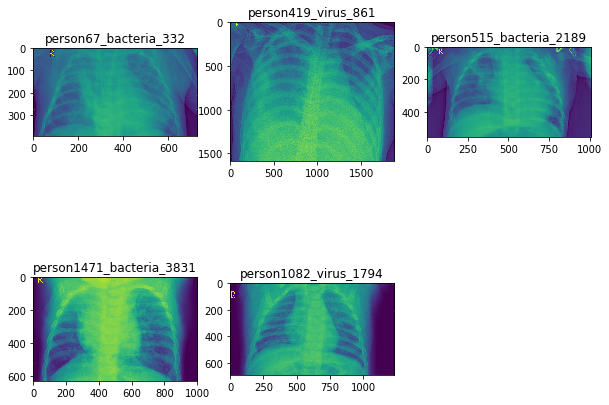

In [13]:
plot_images(type="pneumonia",num=5)

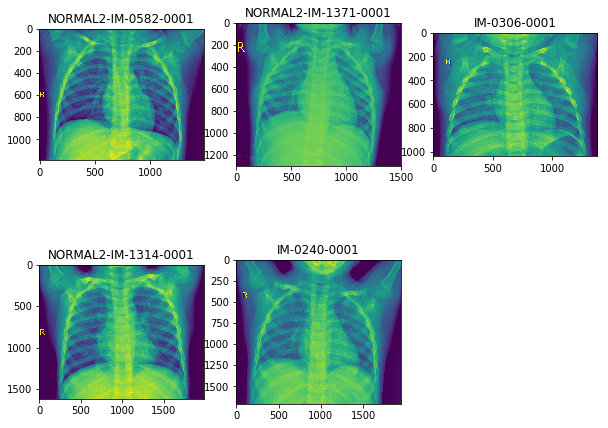

In [14]:
plot_images(type="normal",num=5)

In [15]:
model = get_model()









87916544/87910968 [==============================] - 7s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
___________________

In [16]:
rescale = 1./255.0
target_size = (150, 150)
batch_size = 20
class_mode = 'categorical'

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=rescale
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=rescale)
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rescale=rescale)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=1
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [17]:
model.compile(keras.optimizers.SGD(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
fithistory = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
261/261 [==============================] - 101s 387ms/step - loss: 0.4086 - acc: 0.8326 - val_loss: 1.7211 - val_acc: 0.6587
Epoch 2/5
261/261 [==============================] - 89s 343ms/step - loss: 0.2923 - acc: 0.8894 - val_loss: 1.4485 - val_acc: 0.6635
Epoch 3/5
261/261 [==============================] - 90s 345ms/step - loss: 0.2700 - acc: 0.8907 - val_loss: 0.9206 - val_acc: 0.6971
Epoch 4/5
261/261 [==============================] - 91s 351ms/step - loss: 0.2623 - acc: 0.8917 - val_loss: 0.8673 - val_acc: 0.6875
Epoch 5/5
261/261 [==============================] - 91s 347ms/step - loss: 0.2529 - acc: 0.8982 - val_loss: 0.8070 - val_acc: 0.6795


In [19]:
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=3, use_multiprocessing=True)
print('Model Loss:', result[0])
print('Model Accuracy:', result[1])

Model Loss: 0.558580779703334
Model Accuracy: 0.75


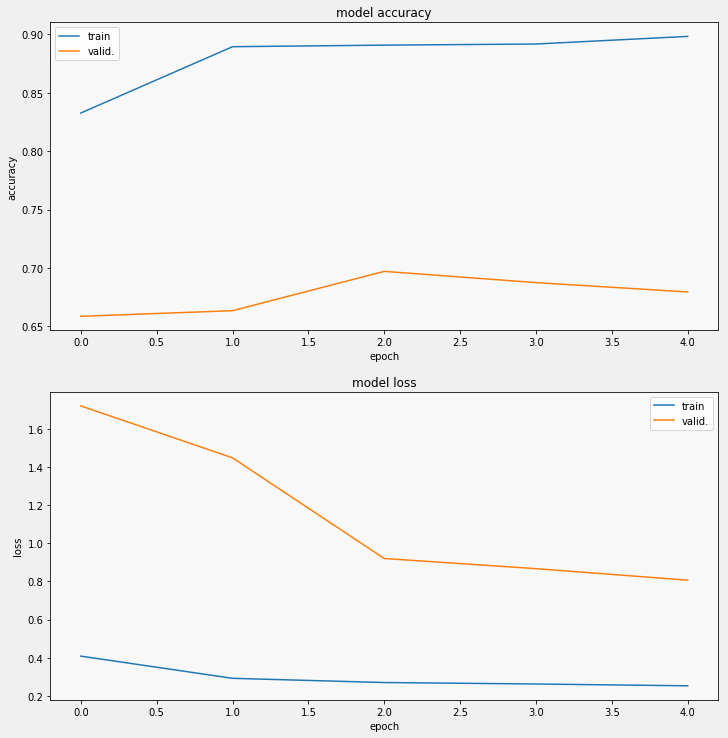

In [20]:
display_training_curves(fithistory.history['acc'], fithistory.history['val_acc'], 'accuracy', 211)
display_training_curves(fithistory.history['loss'], fithistory.history['val_loss'], 'loss', 212)

In [26]:
result  = model.evaluate_generator(test_generator,steps=len(test_generator))
print('Loss:', result[0])
print('Accuracy:', result[1])

Loss: 0.558580779703334
Accuracy: 0.75


In [0]:
#Predictions
filenames = test_generator.filenames
nb_samples = len(filenames)
prediction = model.predict_generator(test_generator,steps = nb_samples).argmax(axis=-1)

#print(prediction)
#True labels
#print(test_generator.classes)
#filenames

In [0]:


def shaw(filename):
  fig = plt.figure(figsize=(3, 3))
  #filename = os.path.join(updir,filename)
  img = image.load_img(filename, 
                     target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  y = model.predict(x)

  predicton="Normal" if y.argmax(axis=-1)==0 else "Pneumonia"
  actual="Normal" if "NORMAL" in filename else "Pneumonia" 

  img=mpimg.imread(filename)
  title_text = ("%s%s%s%s%s"%("True Label: ", actual, "\n", "Prediction: ", predicton))
  if(actual==predicton):
    plt.title(title_text,color='g')
  else:
    plt.title(title_text,color='r')
    
  imgplot=plt.imshow(img)
  plt.show()


Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg


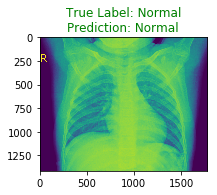

Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg


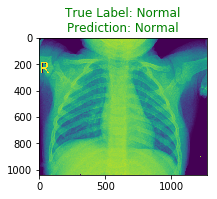

Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg


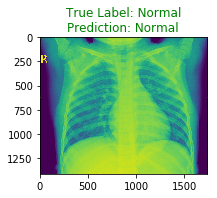

Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg


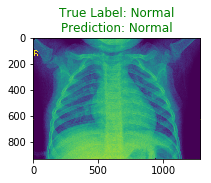

Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg


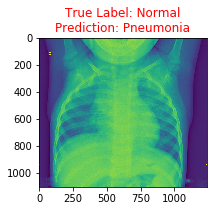

Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg


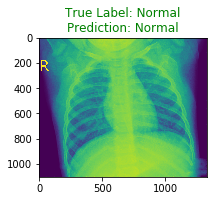

Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg


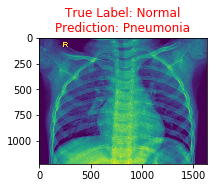

Result:  /content/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg


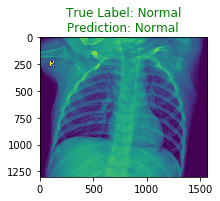

Result:  /content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg


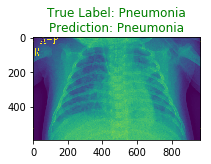

Result:  /content/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg


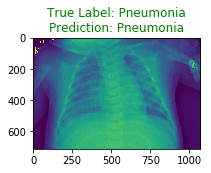

Result:  /content/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg


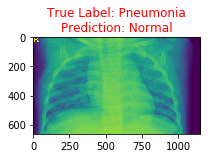

Result:  /content/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg


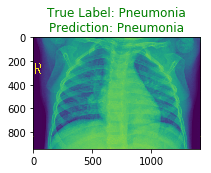

Result:  /content/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg


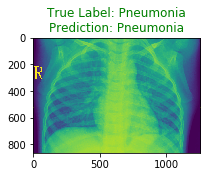

Result:  /content/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg


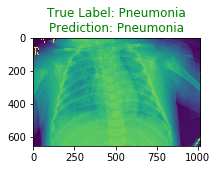

Result:  /content/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg


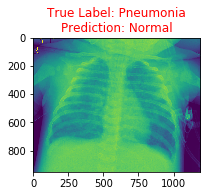

Result:  /content/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg


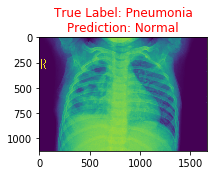

In [28]:
updir = "/content/chest_xray/val/"

for i in filenames:
  i = os.path.join(updir,i)
  print("Result: ",i)
  shaw(i)